In [2]:
import matplotlib.pyplot as plt
import sys

In [3]:
def graph(n, to_ignore=[], broadcast=[]):
    timings = []
    min_delivered = sys.maxsize
    for i in range(n):
        if i+1 in to_ignore:
            continue
        with open(f'logs/proc{i+1:02}.stderr', 'r') as f:
            lines = f.readlines()
        ms = [int(l.strip())*1e-3 for l in lines]

        p = plt.plot([x/1e6 for x in ms], range(len(ms)))
        if broadcast:
            plt.axvline(x=broadcast[i], color=p[0].get_color())
        timings.append(ms[-1]/len(ms))
        min_delivered = min(len(ms), min_delivered)
    mean_timing = sum(timings)/len(timings)
    unit = 'µs'
    if mean_timing / 1000 > 1:
        mean_timing /= 1000
        unit = 'ms'
    print(f' - {mean_timing:.4} {unit} per delivered message (min. {min_delivered} messages delivered)')

 - 86.75 µs per delivered message (min. 1124665 messages delivered)


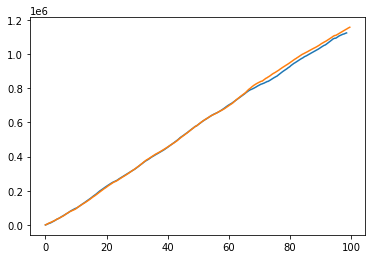

In [453]:
graph(2)